In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
import statsmodels.api as sm
import statsmodels.formula.api as smf
from itertools import combinations

df = pd.read_csv("data/allendale-students.csv")

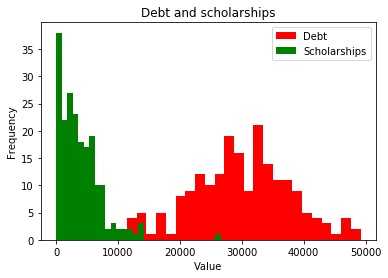

In [113]:
n_bins = 30
colors = ["red", "green"]
plt.hist(df.debt, bins=n_bins, color=colors[0])
plt.hist(df.scholarship, bins=n_bins, color=colors[1])
plt.ylabel('Frequency')
plt.xlabel('Value')
plt.title("Debt and scholarships")
labels= ["Debt","Scholarships"]
_ = plt.legend(labels)

In [114]:
df_with_dummies = pd.get_dummies(df).drop(columns=['housing_off campus', 'major_STEM']) 
df_with_dummies.columns = df_with_dummies.columns.str.replace(' ', '_')
df_with_dummies # off-campus and stem majors are reference catgories

,distance,scholarship,parents,car,debt,housing_on_campus,major_business,major_other
0,40,1532,0.440,6,26389,0,0,0
1,30,7479,0.265,7,21268,1,0,0
2,130,2664,0.115,3,32312,1,1,0
3,120,1998,0.325,9,28539,1,1,0
4,30,1462,0.105,10,34867,0,0,1
...,...,...,...,...,...,...,...,...
195,30,5321,0.445,8,21873,0,0,0
196,50,5916,0.020,10,33122,0,0,0
197,410,5583,0.200,7,33666,1,1,0
198,320,1282,0.250,4,44262,0,1,0


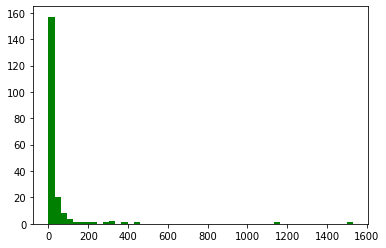

In [115]:
df['scholarship_debt'] = df['debt']/ df['scholarship']
n_bins = 50
_ = plt.hist(df['scholarship_debt'], bins=n_bins, color=colors[1])

In [116]:
predictors = df_with_dummies.drop(columns='debt')
cols = predictors.columns

## Get formula

In [146]:
formula_list = []
n_columns = len(cols) + 1
for i in range(1, n_columns):
    iters = combinations(cols, i)
    for item in iters:
        formula = "debt ~ " + " + ".join(item)
        formula_list.append(formula)

In [118]:
def count_params(model):
    params = model.replace("+", ",")
    params = params.replace("debt ~", "")
    n_params = params.count(',') + 1
    
    return n_params

params = map(count_params, formula_list)

In [119]:
def get_r_sq(model):
    mod = smf.ols(formula=model, data=df_with_dummies)
    res = mod.fit()
    out = [res.rsquared_adj] + list(res.params)
    return out

adj_R = map(get_r_sq, formula_list)

In [148]:
def get_r_sq(model):
    mod = smf.ols(formula=model, data=df_with_dummies)
    res = mod.fit()
    return res.rsquared_adj

adj_R = map(get_r_sq, formula_list)

adj_r_df = pd.DataFrame({'model': formula_list, 
                         'adj_rsq': adj_R, 
                         'n_params': params
                         })

ValueError: arrays must all be same length

In [120]:
get_r_sq(model = formula_list[0])

[0.24430230058277413, 24910.734232888928, 47.25003383854036]

In [121]:
coef_df = pd.DataFrame({'model': formula_list, 
                         'adj_rsq': adj_R, 
                         'n_params': params
                         })

In [138]:
 coeffs = pd.DataFrame(adj_r_df.adj_rsq.values.tolist()).iloc[:,1:9]
 coeffs.add_prefix('beta_')

,beta_1,beta_2,beta_3,beta_4,beta_5,beta_6,beta_7,beta_8
0,24910.734233,47.250034,NaN,NaN,NaN,NaN,NaN,NaN
1,35735.773269,-1.606293,NaN,NaN,NaN,NaN,NaN,NaN
2,35587.432644,-22931.586888,NaN,NaN,NaN,NaN,NaN,NaN
3,29553.705664,-11.437947,NaN,NaN,NaN,NaN,NaN,NaN
4,28789.608333,1707.791667,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
122,37340.465783,40.096679,-1.535280,-22732.180567,535.129515,849.541682,-984.887606,NaN
123,30807.718552,42.366533,-1.517433,43.162770,553.237747,209.122068,-570.624572,NaN
124,30864.417863,44.348504,-22050.624647,-136.820594,720.892165,2603.353304,297.322404,NaN
125,41505.104362,-1.612190,-24388.569853,-4.936134,1442.239395,1085.012177,-734.881610,NaN


In [139]:
adj_r_df.sort_values(by=['adj_rsq'], ascending=False)

,model,adj_rsq,n_params
103,debt ~ distance + scholarship + parents + majo...,"[0.7456742762603897, 37543.69293028915, 40.464...",5
122,debt ~ distance + scholarship + parents + hous...,"[0.7453258246209475, 37340.465782910105, 40.09...",6
66,debt ~ distance + scholarship + parents + majo...,"[0.7451778713515491, 37853.28639915994, 40.552...",4
65,debt ~ distance + scholarship + parents + majo...,"[0.7450171557001963, 37204.653876998476, 40.38...",4
101,debt ~ distance + scholarship + parents + hous...,"[0.7448264441938217, 37000.14336357948, 39.993...",5
...,...,...,...
61,debt ~ car + major_business + major_other,"[-0.0024748799315679193, 29079.911903782573, -...",3
6,debt ~ major_other,"[-0.005010227909742815, 29447.62195121952, 139...",1
3,debt ~ car,"[-0.0050430094972617745, 29553.705664119876, -...",1
60,debt ~ car + housing_on_campus + major_other,"[-0.005282403328521479, 28776.030611254493, -4...",3


In [140]:
top_models = adj_r_df[adj_r_df['n_params'] < 4].sort_values(by=['adj_rsq'], ascending=False).head(5)
best_subset = top_models.iloc[0, 0]

In [141]:
model = smf.ols(formula=best_subset, data=df_with_dummies)
fit = model.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   debt   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     192.5
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           3.62e-58
Time:                        08:23:51   Log-Likelihood:                -1955.2
No. Observations:                 200   AIC:                             3918.
Df Residuals:                     196   BIC:                             3932.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.751e+04    852.185     44.016      

In [126]:
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
so[so!=1]


scholarship       debt                0.642963
debt              scholarship         0.642963
distance          debt                0.498096
debt              distance            0.498096
                  parents             0.375440
parents           debt                0.375440
scholarship       scholarship_debt    0.275512
scholarship_debt  scholarship         0.275512
                  debt                0.229879
debt              scholarship_debt    0.229879
distance          scholarship_debt    0.093353
scholarship_debt  distance            0.093353
scholarship       distance            0.078612
distance          scholarship         0.078612
                  parents             0.062568
parents           distance            0.062568
car               scholarship_debt    0.053710
scholarship_debt  car                 0.053710
                  parents             0.034507
parents           scholarship_debt    0.034507
scholarship       car                 0.031174
car          

In [127]:
adj_r_df

,model,adj_rsq,n_params
0,debt ~ distance,"[0.24430230058277413, 24910.734232888928, 47.2...",1
1,debt ~ scholarship,"[0.41043937503909445, 35735.77326869441, -1.60...",1
2,debt ~ parents,"[0.136616379363652, 35587.43264370504, -22931....",1
3,debt ~ car,"[-0.0050430094972617745, 29553.705664119876, -...",1
4,debt ~ housing_on_campus,"[0.0047702610420479186, 28789.608333333344, 17...",1
...,...,...,...
122,debt ~ distance + scholarship + parents + hous...,"[0.7453258246209475, 37340.465782910105, 40.09...",6
123,debt ~ distance + scholarship + car + housing_...,"[0.6052507987712804, 30807.718552031794, 42.36...",6
124,debt ~ distance + parents + car + housing_on_c...,"[0.3684680834820988, 30864.4178631702, 44.3485...",6
125,debt ~ scholarship + parents + car + housing_o...,"[0.56595827200616, 41505.10436246401, -1.61218...",6


ValueError: color kwarg must have one color per data set. 127 data sets and 1 colors were provided

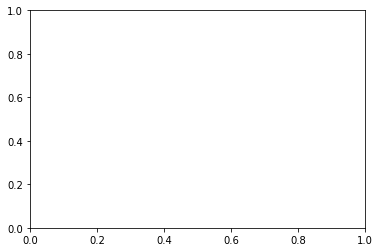

In [142]:
plt.hist(adj_r_df.adj_rsq, bins=n_bins, color=colors[0])
plt.ylabel('Frequency')
plt.xlabel('Value')